# K Means Clusttering

![title](intuitions/1.png) ![title](intuitions/2.png) ![title](intuitions/3.png) ![title](intuitions/4.png) ![title](intuitions/5.png) ![title](intuitions/6.png) ![title](intuitions/7.png) ![title](intuitions/8.png) ![title](intuitions/9.png) ![title](intuitions/10.png) ![title](intuitions/11.png)

## Problem Statement

__There is a big mall in a specific city that contains information of its clients, the clients that subscribe to the membership card when the client subscribe to the card they provided their information like their gender, age, and annual income,  
and because they have this card they use it to buy all sorts of things in the mall therefore the mall has the purchase history of each of its client member and that's how they obtained the last column in the dataset which is a spending score  
Spending score is a score that the mall computed for each of its clients based on several criteria including for eg. their income , the no of times per week they show up in the mall and of course the amount of dollars they spent in a year and based on all this they computed this metric that takes value b/w 1 and 100  
And eventually after collecting this dataset the company hired you as a machine learning scientist to segment their clients into differernt groups based on the annual income and the spending score and since the mall has no idea of what this client segments might be or even has no idea about how many segments there would be therefore this is typically a clustering problem becaue we don't know the answers__

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the dataset 
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

![title](intuitions/12.png) ![title](intuitions/13.png)

![title](intuitions/14.png)

Text(0, 0.5, 'WCSS')

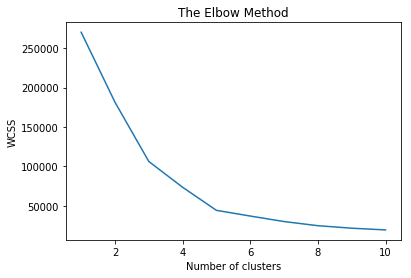

In [4]:
# using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [5]:
# fitting K-Means to the dataset 
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [7]:
%matplotlib notebook

<IPython.core.display.Javascript object>


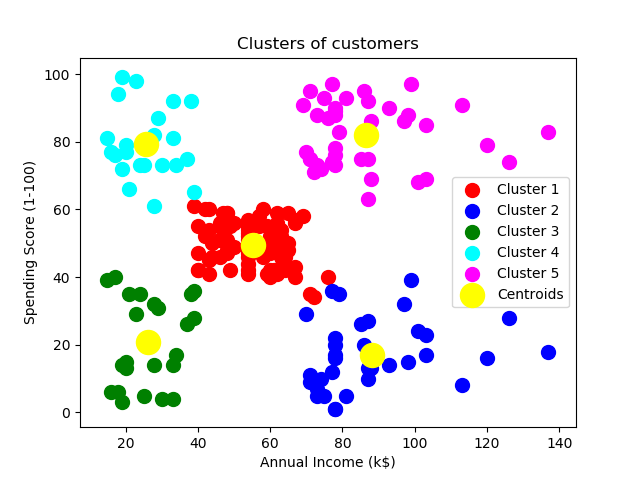

In [8]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

### Cluster 1  
__Clients in cluster 1 have high income and no spending score so in this cluster clients earn a high income but don't spend much money so we could call this cluster of clients  _'Careful'_  clients__  
### Cluster 2
__have average income and average spending score so let's call this cluster of clients _'Standard'___  
### Cluster 3
__have high income and high spending score so that is the cluster of clients that would be the main potential target of the mall marketing campaigns and so it would be very insightful for them all to understand what kind of products are bought by clients in this cluster so we can call them _'Target'___  
### Cluster 4
__low income and high spending score so let's call them _'careless'___  
### Cluster 5
__low income and low spending score so they are _'Sensible'___

<IPython.core.display.Javascript object>


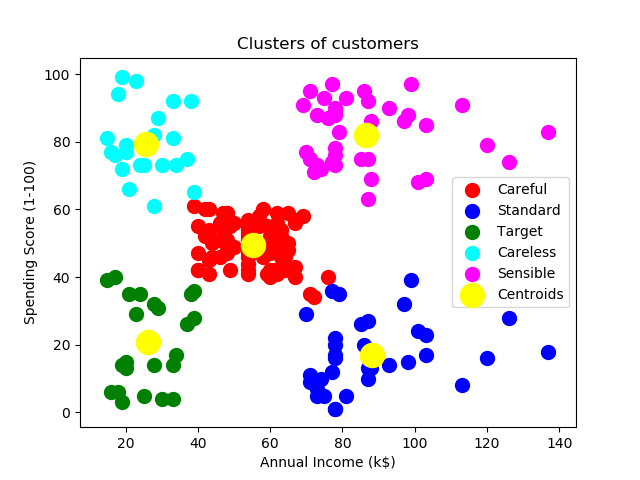

In [10]:
# Visualising the clusters with the correct cluster label
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()